In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import rltools
import numpy as np
import matplotlib.pyplot as plt
from rltools.tabular_solution_methods import SimpleBandit, GradientBandit
from rltools.tests.kArmedTestBed import k_armed_testbed

# Set Initial Parameters

In [3]:
k = 10 # Number of arms
time_steps = 1000 # Number of time steps
q = np.random.normal(0, 1, k) # true action values
rewards = np.asarray(list(map(lambda x : np.random.normal(x, 1, 1000), q))) # Initial rewards

# Instantiate Bandits
## Simple Bandits

In [4]:
simple_bandit = SimpleBandit(k, rewards)

### Epsilon-Greedy Bandit

In [5]:
res = simple_bandit.learn(time_steps=time_steps, eps=0.01, step_size="incremental")

### UCB Bandit

In [6]:
res = simple_bandit.learn(time_steps=time_steps, c=2, step_size="incremental")

## Gradient Bandits

In [7]:
gradient_bandit = GradientBandit(k, rewards)

In [8]:
res = gradient_bandit.learn(time_steps=time_steps, alpha=0.1)

# Test Multi Armed Bandits

In [9]:
mab000 = k_armed_testbed(bandit=simple_bandit, it=2000, time_steps=time_steps, eps=0.00)
mab001 = k_armed_testbed(bandit=simple_bandit, it=2000, time_steps=time_steps, eps=0.01)
mab010 = k_armed_testbed(bandit=simple_bandit, it=2000, time_steps=time_steps, eps=0.10)

In [10]:
grad01 = k_armed_testbed(bandit=gradient_bandit, it=2000, time_steps=time_steps, alpha=0.1)

In [11]:
mabucb = k_armed_testbed(bandit=simple_bandit, it=2000, time_steps=time_steps, c=2)

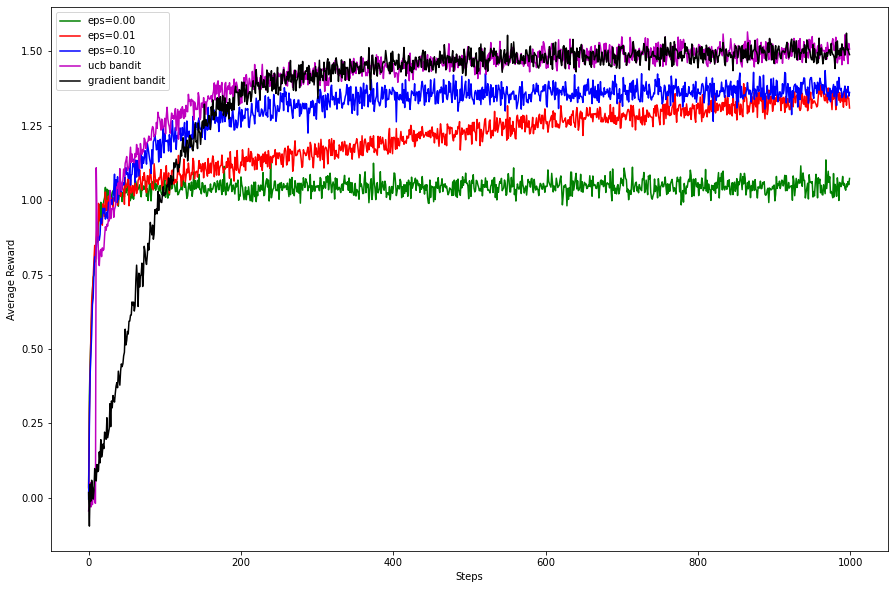

In [12]:
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(time_steps), mab000, 'g', label='eps=0.00')
plt.plot(np.arange(time_steps), mab001, 'r', label='eps=0.01')
plt.plot(np.arange(time_steps), mab010, 'b', label='eps=0.10')
plt.plot(np.arange(time_steps), mabucb, 'm', label='ucb bandit')
plt.plot(np.arange(time_steps), grad01, 'k', label='gradient bandit')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()